In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Importing data

spam_data = pd.read_csv("C:\\Users\\DEVAVRAT\\Desktop\\codsoft\\Machine learning\\spam\\spam.csv" , encoding="latin1")

In [3]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam_data.shape

(5572, 2)

In [5]:
spam_data.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
spam_data.isnull().sum()

v1    0
v2    0
dtype: int64

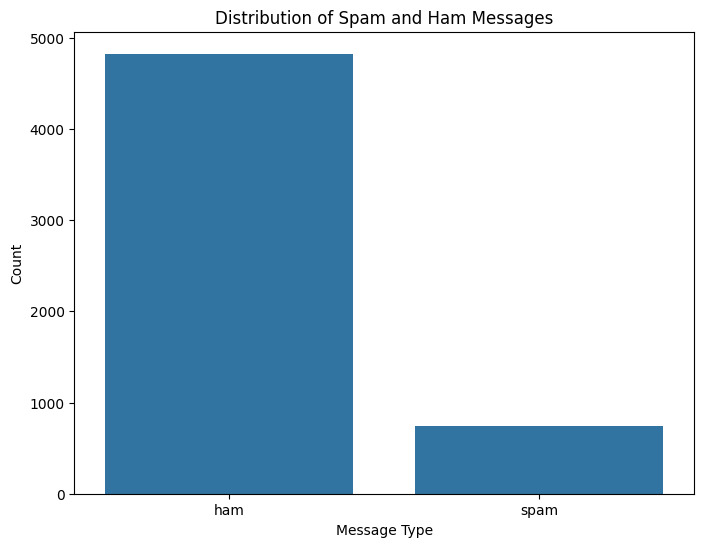

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=spam_data)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [8]:
spam_copy = spam_data.copy()

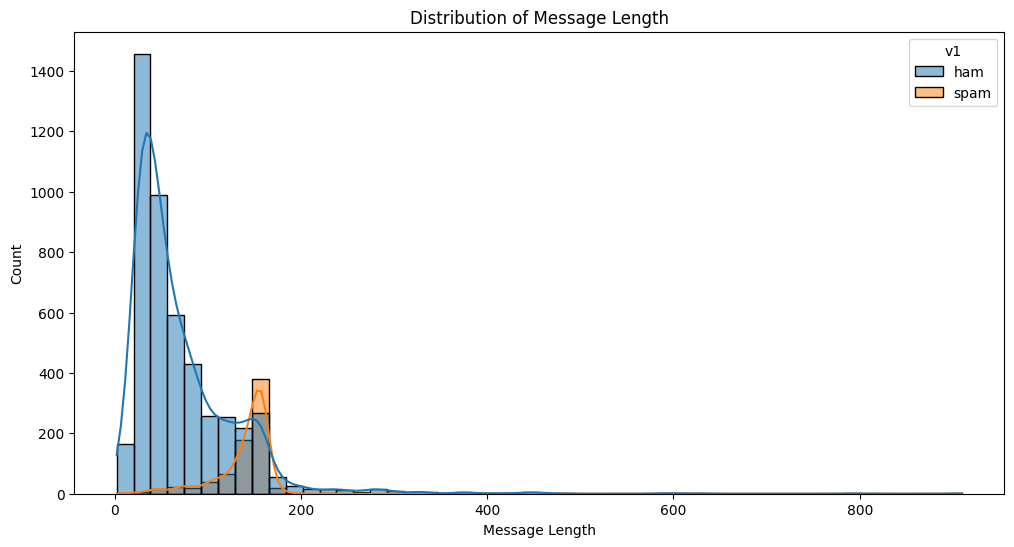

In [9]:
spam_data['Message_Length'] = spam_data['v2'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=spam_data, x='Message_Length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

In [10]:
spam_data.head()

,v1,v2,Message_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:

spam_copy["Message_length"] = np.log1p(spam_copy['v2'].apply(len))

In [12]:
spam_copy.head()

,v1,v2,Message_length
0,ham,"Go until jurong point, crazy.. Available only ...",4.718499
1,ham,Ok lar... Joking wif u oni...,3.401197
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,5.049856
3,ham,U dun say so early hor... U c already then say...,3.912023
4,ham,"Nah I don't think he goes to usf, he lives aro...",4.127134


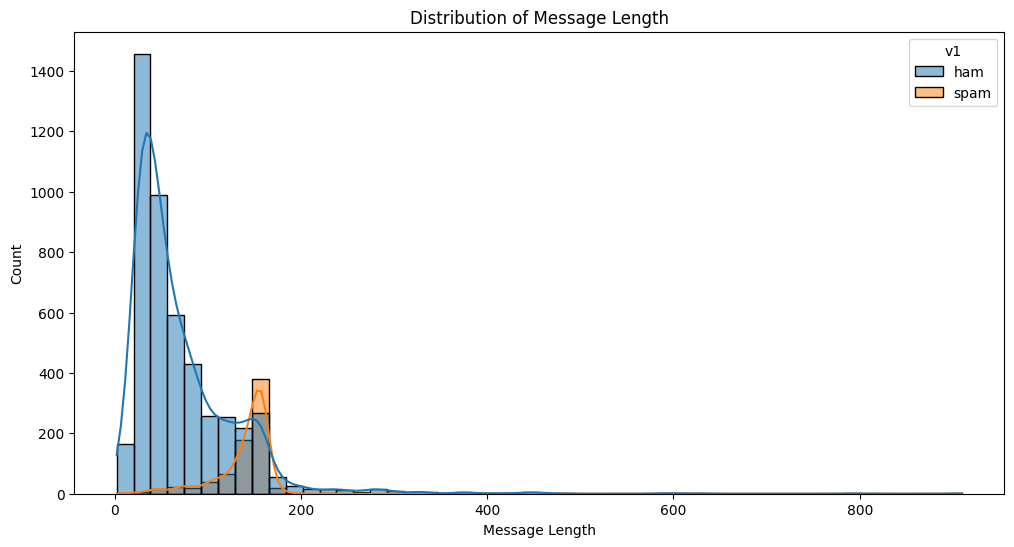

In [13]:
spam_copy['Message_Length'] = spam_copy['v2'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=spam_copy, x='Message_Length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

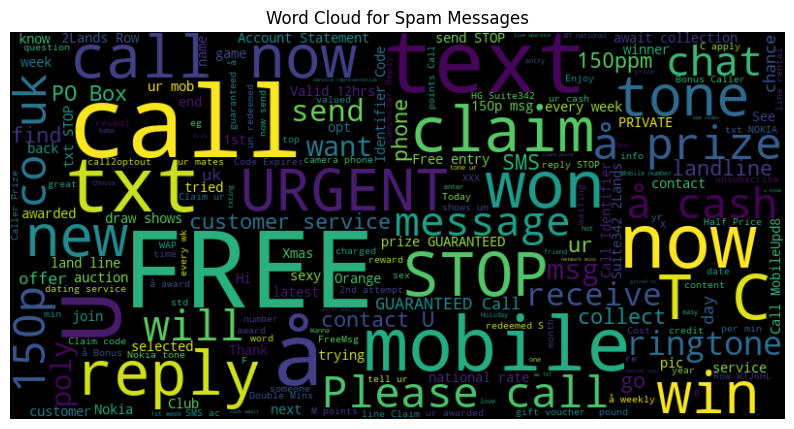

In [14]:


spam_messages = ' '.join(spam_data[spam_data['v1'] == 'spam']['v2'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(spam_messages)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [15]:
# Split the data into features and labels
X = spam_data['v2']
y = spam_data['v1']

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# Create a CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [18]:

# Create a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [19]:

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)


In [20]:
print(predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


In [28]:

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



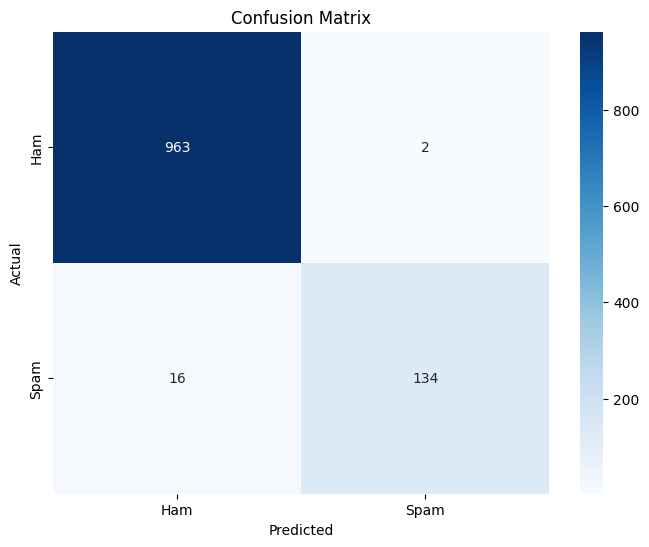

In [22]:
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()